In [1]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Salary')

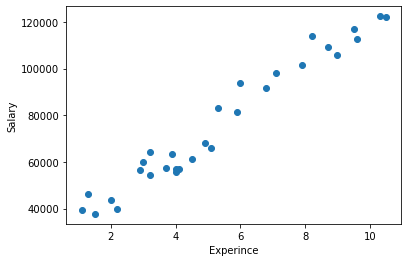

In [3]:
plt.scatter(df.YearsExperience,df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')

In [4]:
scaler = MinMaxScaler()

scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])


scaler.fit(df[['YearsExperience']])
df['YearsExperience'] = scaler.transform(df[['YearsExperience']])


Text(0, 0.5, 'Salary')

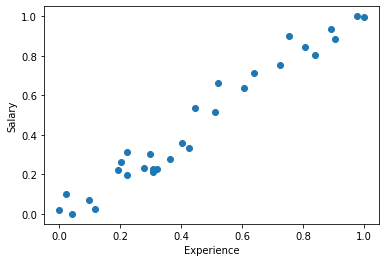

In [5]:
plt.scatter(df.YearsExperience,df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')

In [27]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df[['YearsExperience','Salary']])
y_pred

array([3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['clusters'] = y_pred
df.head()

,YearsExperience,Salary,clusters
0,0.000000,0.019041,3
1,0.021277,0.100094,3
2,0.042553,0.000000,3
3,0.095745,0.068438,3
4,0.117021,0.025514,3


In [29]:
km.cluster_centers_

array([[0.29521277, 0.26402374],
       [0.88297872, 0.90880328],
       [0.57446809, 0.63650287],
       [0.05531915, 0.04261753]])

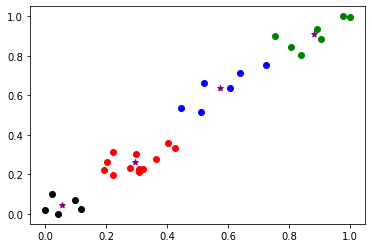

In [30]:
df1 = df[df.clusters==0]
df2= df[df.clusters==1]
df3= df[df.clusters==2]
df4= df[df.clusters==3]
plt.scatter(df1.YearsExperience,df1['Salary'],color='Red')
plt.scatter(df2.YearsExperience,df2['Salary'],color='Green')
plt.scatter(df3.YearsExperience,df3['Salary'],color='Blue')
plt.scatter(df4.YearsExperience,df4['Salary'],color='Black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='purple')

In [31]:
sse =[]
krange = range(1,10)
for k in krange:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)
sse
    

[5.684101493731802,
 1.1964172294563447,
 0.6595353283667087,
 0.2856507223864634,
 0.20142103824997884,
 0.14621099079652466,
 0.10586296297154271,
 0.08576384962602342,
 0.07009171844141443]

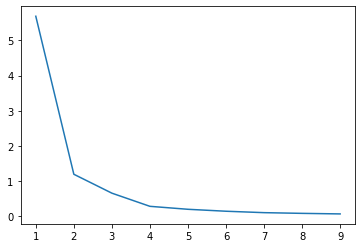

In [32]:
plt.plot(krange,sse)